# 3 December - Rome Workshop

## Introduction

This is a demo of the converter, to give a rough idea of how it can be used.

The main function that can be used to trigger the conversion of a PLEXOS model to a PyPSA network is the `run_model_workflow()` function.
This is the function that goes through the process of reading the input files from the PLEXOS model, maps features and properties to a PyPSA network, and add these features and properties to a PyPSA network that can then be solved.

### Sample models

The sample models available to run at the moment are:
* `caiso-irp23`: CAISO (California Independent System Operator) Integrated Resource Plan (IRP) 25 MMT
* `sem-2024-2032`: SEM (Single Electricity Market on the island of Ireland) 2024-2032 Model
* `aemo-2024-prog`: AEMO (Australian Energy Market Operator) 2024 Integrated System Plan (ISP)

When `run_model_workflow()` is triggered with a sample model, the converter does the following:
1. Looks for the model input files -- locally if installing the converter from source, in your environment if installing using `pip`
2. Download the model input files -- if the files cannot be found, the converter will automatically download the files. If you have already downloaded the model before and it already exists, the converter will skip this step.
3. Convert the input XML file to a collection of CSV files -- using the `plexos-coad` package, the input XML file (which is not human-readable) is turned into a collection of CSVs (Generator.csv, Storage.csv, etc) that contains the different components, as well as their properties
4. Detection of demand file and creation of snapshots -- the converter looks for a demand time series file (this can also be specified manually) and uses this to create the PyPSA network snapshots and also ports this data as the load
   1. Note: the converter is also capable of handling model configurations where buses/nodes have "load participation factors" and will divide the load accordingly.
5. The converter adds the basic network topology components, such as generators, capacity ratings, transmission lines, storage units, etc to the PyPSA network.
6. If detected in the model input data, the converter will also implement an outage and maintenance scheduling.
7. If triggered (via `run_model_workflow(solve=True)`), the converter will solve the converted network.

## Using the converter

### Convert a sample model

As an example, we will convert the `caiso-irp23` model.

In [ ]:
import sys
from pathlib import Path

# Add src to path
sys.path.insert(0, str(Path.cwd().parent / "src"))

# Load main converter function
from plexos_to_pypsa_converter.workflow import run_model_workflow

# Convert the model (without solving)
network, summary = run_model_workflow("caiso-irp23", solve=False)

INFO:plexos_to_pypsa_converter.network.core_csv:Setting up network from CSVs...
INFO:plexos_to_pypsa_converter.network.core_csv:  CSV directory: /Users/meas/oet/plexos-pypsa/src/plexos_to_pypsa_converter/examples/data/caiso-irp23/csvs_from_xml/WECC
INFO:plexos_to_pypsa_converter.network.core_csv:  Demand strategy: participation_factors
INFO:plexos_to_pypsa_converter.network.core_csv:Added 8 buses from CSV
INFO:plexos_to_pypsa_converter.network.core_csv:Added 27 carriers from CSV
INFO:plexos_to_pypsa_converter.network.core_csv:Setting up snapshots and demand from CSV files...


Loaded 8 Region objects from Region.csv
Loaded 8 Node objects from Node.csv
Loaded 943 Generator objects from Generator.csv
Running workflow for model: caiso-irp23
Model directory: /Users/meas/oet/plexos-pypsa/src/plexos_to_pypsa_converter/examples/data/caiso-irp23
Workflow steps: 6

Step 1/6: create_model

Checking for CSV exports in /Users/meas/oet/plexos-pypsa/src/plexos_to_pypsa_converter/examples/data/caiso-irp23...
Found existing CSV export at: /Users/meas/oet/plexos-pypsa/src/plexos_to_pypsa_converter/examples/data/caiso-irp23/csvs_from_xml/WECC
Creating model: CAISO IRP 2023 Stochastic
Model type: electricity
XML file: /Users/meas/oet/plexos-pypsa/src/plexos_to_pypsa_converter/examples/data/caiso-irp23/CAISOIRP23Stochastic 20240517.xml
Model directory: /Users/meas/oet/plexos-pypsa/src/plexos_to_pypsa_converter/examples/data/caiso-irp23
Setting up electricity model from CSVs...
Loaded 8 Node objects from Node.csv
Loaded 27 Fuel objects from Fuel.csv


INFO:plexos_to_pypsa_converter.network.core_csv:  Using participation factors strategy


  - Processing CAISO/SEM format file: /Users/meas/oet/plexos-pypsa/src/plexos_to_pypsa_converter/examples/data/caiso-irp23/LoadProfile/Load_2024 0308.csv
    - Detected 24 periods per day, using 60-minute resolution
  - Detected CAISO/SEM format file: Load_2024 0308.csv
  - Detected iteration-based format with 500 iterations
    - Processing iteration 1: 24 periods/day, 60min resolution
    - Processing iteration 2: 24 periods/day, 60min resolution
    - Processing iteration 3: 24 periods/day, 60min resolution
    - Processing iteration 4: 24 periods/day, 60min resolution
    - Processing iteration 5: 24 periods/day, 60min resolution
    - Processing iteration 6: 24 periods/day, 60min resolution
    - Processing iteration 7: 24 periods/day, 60min resolution
    - Processing iteration 8: 24 periods/day, 60min resolution
    - Processing iteration 9: 24 periods/day, 60min resolution
    - Processing iteration 10: 24 periods/day, 60min resolution
    - Processing iteration 11: 24 periods/

INFO:plexos_to_pypsa_converter.network.core:Detecting load distribution pattern...
INFO:plexos_to_pypsa_converter.network.core:  Node-level factors: False
INFO:plexos_to_pypsa_converter.network.core:  Region-level factors: True
INFO:plexos_to_pypsa_converter.network.core:  Region load files: False
INFO:plexos_to_pypsa_converter.network.core:Pattern detected: System load with region-level participation factors (CAISO style)
INFO:plexos_to_pypsa_converter.network.core:  Added Load_LFD to bus LFD: factor=0.9998 (99.98%), peak=55230.4 MW
INFO:plexos_to_pypsa_converter.network.core:  Added Load_PG&E_BAY to bus CIPB: factor=0.0000 (0.00%), peak=2.2 MW
INFO:plexos_to_pypsa_converter.network.core:  Added Load_PG&E_VLY to bus CIPV: factor=0.0000 (0.00%), peak=2.7 MW
INFO:plexos_to_pypsa_converter.network.core:  Added Load_SCE to bus CISC: factor=0.0001 (0.01%), peak=5.2 MW
INFO:plexos_to_pypsa_converter.network.core:  Added Load_SDGE to bus CISD: factor=0.0000 (0.00%), peak=1.0 MW
INFO:plexos_t

    - Processing iteration 363: 24 periods/day, 60min resolution
    - Processing iteration 364: 24 periods/day, 60min resolution
    - Processing iteration 365: 24 periods/day, 60min resolution
    - Processing iteration 366: 24 periods/day, 60min resolution
    - Processing iteration 367: 24 periods/day, 60min resolution
    - Processing iteration 368: 24 periods/day, 60min resolution
    - Processing iteration 369: 24 periods/day, 60min resolution
    - Processing iteration 370: 24 periods/day, 60min resolution
    - Processing iteration 371: 24 periods/day, 60min resolution
    - Processing iteration 372: 24 periods/day, 60min resolution
    - Processing iteration 373: 24 periods/day, 60min resolution
    - Processing iteration 374: 24 periods/day, 60min resolution
    - Processing iteration 375: 24 periods/day, 60min resolution
    - Processing iteration 376: 24 periods/day, 60min resolution
    - Processing iteration 377: 24 periods/day, 60min resolution
    - Processing iteratio

/Users/meas/oet/plexos-pypsa/src/plexos_to_pypsa_converter/network/generators_csv.py:897: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/Users/meas/oet/plexos-pypsa/src/plexos_to_pypsa_converter/network/generators_csv.py:897: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

INFO:plexos_to_pypsa_converter.db.csv_readers:Generator 'CC_FDYMNT_13.8_CT1_38071_1' has multiple fuels ['NG_CA PGaE BB', 'NG_AZ South']. Using primary fuel: 'NG_CA PGaE BB'
INFO:plexos_to_pypsa_converter.db.csv_readers:Generator 'CC_FDYMNT_13.8_CT2_38079_2' has multiple fuels ['NG_CA PGaE BB', 'DefaultFuel']. Using primary fuel: 'NG_CA PGaE BB'
INFO:plexos_to_pypsa_conve

Note: Geothermal_Greater_Imperial has capacity expansion schedule (3 stages, currently using 498.20 MW). Full expansion modeling not yet implemented.
Note: Geothermal_IID has capacity expansion schedule (5 stages, currently using 84.46 MW). Full expansion modeling not yet implemented.
Note: Geothermal_Northern_California has capacity expansion schedule (3 stages, currently using 277.70 MW). Full expansion modeling not yet implemented.
Note: Geothermal_PGE has capacity expansion schedule (5 stages, currently using 532.74 MW). Full expansion modeling not yet implemented.
Note: Geothermal_SCE has capacity expansion schedule (5 stages, currently using 586.29 MW). Full expansion modeling not yet implemented.
Note: Geothermal_SDGE has capacity expansion schedule (5 stages, currently using 183.74 MW). Full expansion modeling not yet implemented.
2. Setting capacity ratings...
Loaded 943 Generator objects from Generator.csv
Loaded 20750 time-varying properties from Time varying properties.csv


2b. Setting minimum stable levels (p_min_pu)...
Loaded 943 Generator objects from Generator.csv
Loaded 20750 time-varying properties from Time varying properties.csv


Set p_min_pu for 943 generators (778 with nonzero minimum)
2c. Validating generator constraints...
Fixed 13 generators with p_min_pu > p_max_pu constraints
  (Generators cannot meet min stable level at reduced capacity)
Cleared ramp limits for 26 fixed-dispatch generators (p_min == p_max across all snapshots)
3. Setting generator efficiencies...
Loaded 943 Generator objects from Generator.csv
4. Setting capital costs...
Loaded 943 Generator objects from Generator.csv
Set capital costs for 0/943 Generators
5. Setting marginal costs...
Loaded 27 Fuel objects from Fuel.csv
Loaded 20750 time-varying properties from Time varying properties.csv
Loaded 943 Generator objects from Generator.csv


INFO:plexos_to_pypsa_converter.network.core_csv:Adding storage from CSV...
INFO:plexos_to_pypsa_converter.network.storage_csv:Battery.csv not found, skipping battery import
INFO:plexos_to_pypsa_converter.network.storage_csv:Loading standalone hydro storages from Storage.csv...
INFO:plexos_to_pypsa_converter.network.storage_csv:Added 'hydro' carrier to network
INFO:plexos_to_pypsa_converter.network.storage_csv:Hydro storages added: 0
INFO:plexos_to_pypsa_converter.network.core_csv:Adding transmission links from CSV...
INFO:plexos_to_pypsa_converter.network.links_csv:Starting CSV-based link porting process...
INFO:plexos_to_pypsa_converter.network.links_csv:1. Adding links from CSV...
INFO:plexos_to_pypsa_converter.network.links_csv:Adding 16 transmission links from CSV...
INFO:plexos_to_pypsa_converter.network.links_csv:Added 16 links to network
INFO:plexos_to_pypsa_converter.network.links_csv:2. Setting link flow limits...
INFO:plexos_to_pypsa_converter.network.links_csv:Setting link f

Successfully set marginal costs for 943 generators
6. Skipping VRE profiles (no path provided)
7. Skipping generator reassignment (no target node specified)
Generator porting complete! Added 943 generators.
Loaded 8 Node objects from Node.csv
Loaded 943 Generator objects from Generator.csv
Loaded 50 Storage objects from Storage.csv
Loaded 16 Line objects from Line.csv
Loaded 16 Line objects from Line.csv
Loaded 20750 time-varying properties from Time varying properties.csv
Loaded 27 Fuel objects from Fuel.csv
Loaded 20750 time-varying properties from Time varying properties.csv

CAISO IRP 2023 STOCHASTIC - SETUP COMPLETE
Total buses: 8
Total generators: 943
Total links: 16
Total storage units: 0
Total stores: 0
Total loads: 5
Total snapshots: 8760
Loaded 8 Region objects from Region.csv
Loaded 8 Node objects from Node.csv
Loaded 943 Generator objects from Generator.csv
Step 2/6: load_hydro_dispatch
Loaded 943 Generator objects from Generator.csv
Loaded 943 Generator objects from Genera

INFO:plexos_to_pypsa_converter.network.outages:Applying ramp-aware startup/shutdown zones to 829 generators...
INFO:plexos_to_pypsa_converter.network.outages:  Ramped startup/shutdown for 809 generators (avg startup: 0.8 steps, avg shutdown: 0.0 steps)
INFO:plexos_to_pypsa_converter.network.outages:Applied outage schedule to 829 generators
INFO:plexos_to_pypsa_converter.network.outages:  p_max_pu: 829 generators
INFO:plexos_to_pypsa_converter.network.outages:  p_min_pu: 829 generators
INFO:plexos_to_pypsa_converter.network.generators_csv:Generator Units processing complete:
INFO:plexos_to_pypsa_converter.network.generators_csv:  Total generators: 943
INFO:plexos_to_pypsa_converter.network.generators_csv:  Generators with Units data: 829
INFO:plexos_to_pypsa_converter.network.generators_csv:    - With capacity scaling (Units > 1): 0
INFO:plexos_to_pypsa_converter.network.generators_csv:    - With new builds: 0
INFO:plexos_to_pypsa_converter.network.generators_csv:    - With retirements:

apply_generator_units completed

Step 4/6: load_monthly_outages


INFO:plexos_to_pypsa_converter.network.outages:Loaded outage schedules for 240 generators (missing=527, errors=0)
INFO:plexos_to_pypsa_converter.network.outages:Applying ramp-aware startup/shutdown zones to 767 generators...
INFO:plexos_to_pypsa_converter.network.outages:  Ramped startup/shutdown for 757 generators (avg startup: 8.5 steps, avg shutdown: 7.5 steps)
INFO:plexos_to_pypsa_converter.network.outages:Applied outage schedule to 767 generators
INFO:plexos_to_pypsa_converter.network.outages:  p_max_pu: 767 generators
INFO:plexos_to_pypsa_converter.network.outages:  p_min_pu: 767 generators
/Users/meas/oet/plexos-pypsa/src/plexos_to_pypsa_converter/network/slack.py:36: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/meas/oet/plexos-pypsa/src/plex

load_monthly_outages completed

Step 5/6: add_slack
add_slack completed

Step 6/6: save_network


INFO:pypsa.network.io:Exported network 'Unnamed Network' saved to 'src/examples/results/caiso-irp23/solved_network.nc contains: carriers, loads, links, generators, buses


save_network completed

Workflow complete for model: caiso-irp23



### Analyze a solved model

There is a solved (1 year) network on the repository that we can use for analysis: `results/caiso-irp23/solved_network_1year.nc`.

The converter has a built-in analysis module for basic checks called NetworkAnalyzer. This can be used to visualize and have a glance at the basic results of the converted and solved network. Below, I will walk through a simple case of how to do that.

In [2]:
# Load packages and set plotting style
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import pypsa

from plexos_to_pypsa_converter.analysis.styles import apply_default_style

# Add src to path
sys.path.insert(0, str(Path.cwd().parent / "src"))

# Apply default styling
apply_default_style()

# Configure matplotlib for inline display
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
plt.rcParams["savefig.dpi"] = 150
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
# Define path to solved network
network_file = (
    Path.cwd().parent.parent
    / "src"
    / "plexos_to_pypsa_converter"
    / "examples"
    / "results"
    / "caiso-irp23"
    / "solved_network_1year.nc"
)

if not network_file.exists():
    msg = "Network file not found: " + str(network_file)
    # Run the solver notebook to generate the solved network file.
    raise FileNotFoundError(msg)

# Load network
print(f"Loading network: {network_file.name}")
solved_network = pypsa.Network()
solved_network.import_from_netcdf(str(network_file))

print("Network loaded successfully")
print(f"File size: {network_file.stat().st_size / 1024 / 1024:.2f} MB")

Loading network: solved_network_1year.nc


INFO:pypsa.network.io:Imported network '' has buses, carriers, generators, links, loads


Network loaded successfully
File size: 174.64 MB


In [ ]:
# Initialize analyzer with Tableau colors
from plexos_to_pypsa_converter.analysis import NetworkAnalyzer

analyzer = NetworkAnalyzer(
    solved_network, exclude_slack_default=True, color_palette="tableau10"
)

print("NetworkAnalyzer initialized")
print(f"- Spatial resolution: {analyzer.spatial_resolution}")
print(f"- Multi-period: {analyzer.multi_period}")

NetworkAnalyzer initialized
- Spatial resolution: zonal
- Multi-period: False


In [ ]:
# Get network info
info = analyzer.info()

print(" CAISO-IRP23 Network Statistics")
print()
print(f"Buses:              {info['buses']:>6}")
print(f"Generators:         {info['generators']:>6}")
print(f"Loads:              {info['loads']:>6}")
print(f"Links:              {info['links']:>6}")
print(f"Storage Units:      {info['storage_units']:>6}")
print(f"Stores:             {info['stores']:>6}")
print()
print(f"Snapshots:          {info['snapshots']:>6}")

# Display investment periods (0 or N/A for single-period models)
inv_periods = info["investment_periods"]
if inv_periods > 0:
    print(f"Investment Periods: {inv_periods:>6}")
else:
    print(f"Investment Periods: {'N/A':>6}")

print(f"Carriers:           {info['carriers']:>6}")
print(f"Bus Carriers:       {len(info['bus_carriers']):>6}")
print()
print(f"Spatial Resolution: {info['spatial_resolution']}")
print(f"Multi-period:       {info['multi_period']}")
print()
print(f"Has Time Series:    {info['has_time_series']}")
print(f"Has Storage:        {info['has_storage']}")
print(f"Has Stores:         {info['has_stores']}")
print(f"Has Links:          {info['has_links']}")

 CAISO-IRP23 Network Statistics

Buses:                   8
Generators:            959
Loads:                   5
Links:                  16
Storage Units:           0
Stores:                  0

Snapshots:            8760
Investment Periods:    N/A
Carriers:               33
Bus Carriers:            1

Spatial Resolution: zonal
Multi-period:       False

Has Time Series:    True
Has Storage:        False
Has Stores:         False
Has Links:          True


In [ ]:
# Display carriers
carriers = sorted(solved_network.generators.carrier.unique())
print(f"Total unique carriers: {len(carriers)}\n")

# Create a formatted list
for i, carrier in enumerate(carriers, 1):
    if i % 3 == 1:
        print(f"  {i:2d}. {carrier:30s}", end="")
    elif i % 3 == 0:
        print(f"  {i:2d}. {carrier}")
    else:
        print(f"  {i:2d}. {carrier:30s}", end="")
if len(carriers) % 3 != 0:
    print()

Total unique carriers: 29

   1.                                  2. Bio_Agri_Res                     3. Bio_Landfill_Gas_CA
   4. Bio_Other_CA                     5. Bio_Sludge_Waste_CA              6. Bio_Solid_Waste_CA
   7. Bio_Wood_CA                      8. Coal_CA_South                    9. DR - High
  10. DR - Mid                        11. Dummy                           12. Geothermal_CA
  13. NG_AZ_North                     14. NG_AZ_North-South               15. NG_Baja
  16. NG_Baja_CA                      17. NG_CA PGaE BB                   18. NG_CA PGaE LT
  19. NG_CA SDGE                      20. NG_CA SJ Valley                 21. NG_CA SoCalB
  22. NG_CA SoCalGas                  23. NG_Nevada_South                 24. Oil_DistillateFuel_2_CA
  25. Petroleum Coke_CA               26. Uranium                         27. hydro
  28. load shedding                   29. load spillage                 


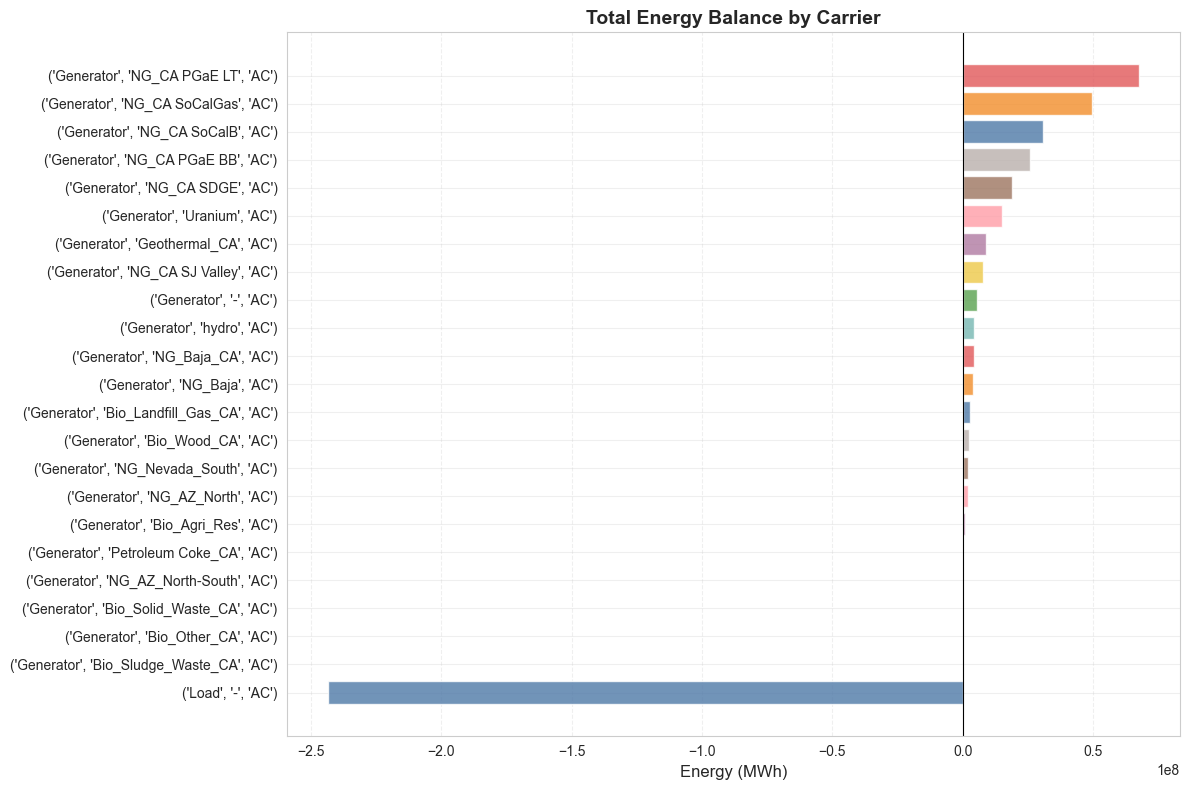

Figure: Total energy balance showing supply (right) and withdrawal (left) by carrier.


In [ ]:
# Create energy balance plot
fig, ax = plt.subplots(figsize=(12, 8))
analyzer.plot_energy_balance_totals(ax=ax)
plt.tight_layout()
plt.show()

print(
    "Figure: Total energy balance showing supply (right) and withdrawal (left) by carrier."
)

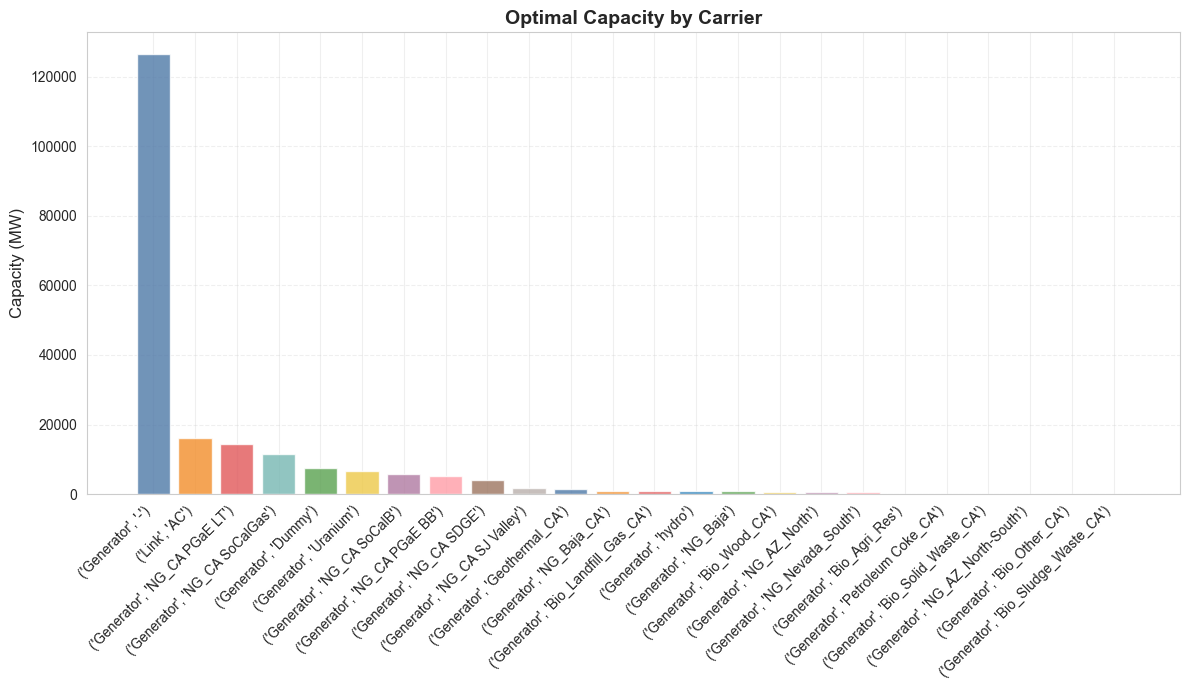

Figure: Optimal generation capacity by carrier (MW).
The high capacity generators that do not have a carrier are generators such as 'LFD' as specified in the CAISO model.


In [ ]:
# Create capacity bar plot
fig, ax = plt.subplots(figsize=(12, 7))
analyzer.plot_capacity_overview(
    capacity_type="optimal", groupby="carrier", ax=ax, exclude_slack=True
)
plt.tight_layout()
plt.show()

print("Figure: Optimal generation capacity by carrier (MW).")
print(
    "The high capacity generators that do not have a carrier are generators such as 'LFD' as specified in the CAISO model."
)

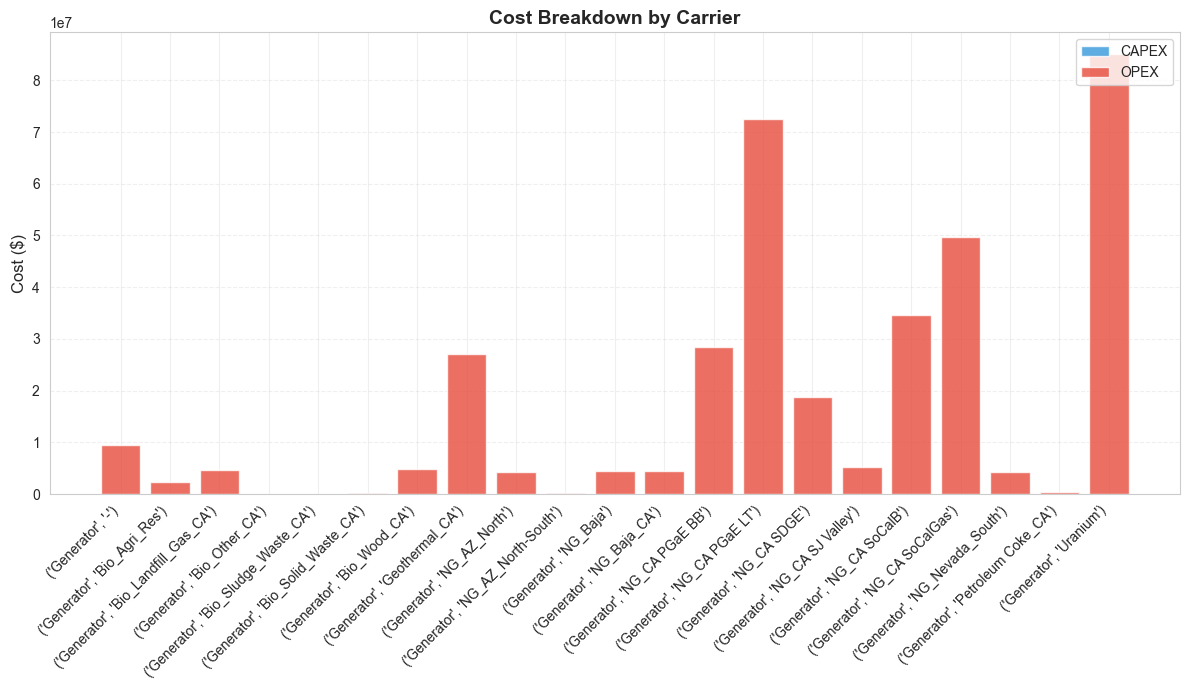

Figure: Cost breakdown showing CAPEX (blue) and OPEX (red) by carrier.


In [ ]:
# Create cost breakdown plot
fig, ax = plt.subplots(figsize=(12, 7))
analyzer.plot_cost_breakdown(groupby="carrier", ax=ax)
plt.tight_layout()
plt.show()

print("Figure: Cost breakdown showing CAPEX (blue) and OPEX (red) by carrier.")

### Convert a custom model

Instead of converting one of the existing sample models built into the converter, you could also convert a PLEXOS model that you have. This assumes that in a single directory, you have the PLEXOS input .xml file, as well as other input time-series CSVs (such as demand per snapshot).
To run the block of code, replace `model_dir` with the path that contains your input model data.

In [ ]:
from pathlib import Path

from plexos_to_pypsa_converter.workflow import run_model_workflow

# Specify model directory
model_dir = Path("/path/to/your/random/model/directory")

# Convert the model (without solving)
network, summary = run_model_workflow(
    "model-name",
    model_dir_override=model_dir,
    solve=False,
)